<a href="https://colab.research.google.com/github/mia-khan/DS5110/blob/main/DS_5110_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import database
def ReadDB(table_name):
    conn = sqlite3.connect('/content/DPCA.db')

    query = f'SELECT * FROM {table_name}'
    df = pd.read_sql(query, conn)

    conn.close()

    return df

df_patient = ReadDB('Patient')
df_procedure = ReadDB('Procedure')
df_patient_financials = ReadDB('Patient_Financials')
df_financial_aid = ReadDB('Financial_Aid')
df_zakat_eligibility = ReadDB('Zakat_Eligibility')

In [3]:
# Clean Patient DataFrame - Remove duplicate headers and set proper data types
df_patient = df_patient.iloc[1:]  # Remove duplicate header row
df_patient.loc[:, 'Age'] = pd.to_numeric(df_patient['Age'], errors='coerce')
df_patient.loc[:, 'Patient_ID'] = pd.to_numeric(df_patient['Patient_ID'], errors='coerce')

# Clean Procedure DataFrame
df_procedure = df_procedure.iloc[1:]  # Remove duplicate header row
df_procedure.loc[:, 'Procedure_ID'] = pd.to_numeric(df_procedure['Procedure_ID'], errors='coerce')
df_procedure.loc[:, 'Patient_ID'] = pd.to_numeric(df_procedure['Patient_ID'], errors='coerce')
df_procedure.loc[:, 'Procedure_Cost'] = pd.to_numeric(df_procedure['Procedure_Cost'], errors='coerce')
df_procedure.loc[:, 'Amount_Paid_DPCA'] = pd.to_numeric(df_procedure['Amount_Paid_DPCA'], errors='coerce')

# Clean Patient Financials DataFrame
df_patient_financials = df_patient_financials.iloc[1:]  # Remove duplicate header row
df_patient_financials.loc[:, 'Financial_Info_ID'] = pd.to_numeric(df_patient_financials['Financial_Info_ID'], errors='coerce')
df_patient_financials.loc[:, 'Patient_ID'] = pd.to_numeric(df_patient_financials['Patient_ID'], errors='coerce')
df_patient_financials.loc[:, 'Dependent_Members'] = pd.to_numeric(df_patient_financials['Dependent_Members'], errors='coerce')

# Clean Financial Aid DataFrame
df_financial_aid = df_financial_aid.iloc[1:]  # Remove duplicate header row
df_financial_aid.loc[:, 'Financial_Aid_ID'] = pd.to_numeric(df_financial_aid['Financial_Aid_ID'], errors='coerce')
df_financial_aid.loc[:, 'Patient_ID'] = pd.to_numeric(df_financial_aid['Patient_ID'], errors='coerce')
df_financial_aid.loc[:, 'Aid_Date'] = pd.to_datetime(df_financial_aid['Aid_Date'], errors='coerce')


In [4]:
# combine dataframes
df_all = pd.concat([df_patient, df_procedure, df_patient_financials, df_financial_aid, df_zakat_eligibility], axis=1)

In [5]:
# check for row duplicates
df_all.duplicated().sum()

0

In [6]:
# check for column duplicates
transposed_df = df_all.transpose()              # transpose dataframe
transposed_df.duplicated().sum()                # find column duplicates

9

In [7]:
# drop column duplicates (no row duplicates)
transposed_df.drop_duplicates(inplace = True)
transposed_df.duplicated().sum()

0

In [8]:
# transpose dataframe to return to original dataframe with no duplicates
df_all = transposed_df.transpose()

In [9]:
# map the data - change text to numbers
df_all['Religion'] = df_all['Religion'].map({'Muslim (Shia)':0, 'Muslim (Sunni)':1})
df_all['Syed_NonSyed'] = df_all['Syed_NonSyed'].map({'Syed':0, 'Non-Syed':1})
df_all['Marriage_Status'] = df_all['Marriage_Status'].map({'Married':0, 'Unmarried':1})
df_all['Income'] = df_all['Income'].map({'No Income': 0, 'No income': 0, '1-10000/month': 5000, '10001-50000/month': 30000, '50001-100000/month': 75000, '100001-150000/month': 125000}).fillna(df_all['Income'])

In [10]:
# return # of each column's none values
df_all.replace('', pd.NA, inplace=True)  # Replace empty strings with NaN (if needed)
df_all.isnull().sum()

<ipython-input-10-7019d33b58d3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all.replace('', pd.NA, inplace=True)  # Replace empty strings with NaN (if needed)


,0
Patient_ID,1
Patient_Name,1
Age,22
Religion,12
Syed_NonSyed,1
Marriage_Status,1
CNIC_No,4
Contact_No,12
Address,9
Procedure_Type,1


In [11]:
#Transforming data/ filling or dropping null values
#df_all['Income'] = df_all['Income'].fillna('N.A')         # I think it might be better to keep numerical values as NaN instead of 'N.A' because it's a string? - Onn Ye
df_all['Procedure_Cost'] = df_all['Procedure_Cost'].fillna('N.A')
df_all['Aid_Type'] = df_all['Aid_Type'].fillna('N.A')
df_all['Eligibility_Criteria'] = df_all['Eligibility_Criteria'].fillna('N.A')

df_all['Religion'] = df_all['Religion'].fillna('Unknown')
df_all['Syed_NonSyed'] = df_all['Syed_NonSyed'].fillna('Unknown')
df_all['Marriage_Status'] = df_all['Marriage_Status'].fillna('Unknown')
df_all['Contact_No'] = df_all['Contact_No'].fillna('Unknown')
df_all['Address'] = df_all['Address'].fillna('Unknown')
df_all['Occupation'] = df_all['Occupation'].fillna('Unknown')
df_all['Procedure_Date'] = df_all['Procedure_Date'].fillna('Unknown')

df_all['Dependent_Members'] = df_all['Dependent_Members'].fillna(0)
df_all['Properties_Owned'] = df_all['Properties_Owned'].fillna(0)
df_all['Amount_Paid_DPCA'] = df_all['Amount_Paid_DPCA'].fillna(0)
df_all['Financial_Support_Method'] = df_all['Financial_Support_Method'].fillna('Unknown')
df_all['Is_Eligible'] = df_all['Is_Eligible'].fillna('No')

df_all['Patient_ID'] = df_all['Patient_ID'].fillna('Unknown')  # or use a default ID if needed
df_all['Patient_Name'] = df_all['Patient_Name'].fillna('Unknown')
df_all['Age'] = df_all['Age'].fillna(0)  # assuming age 0 for missing data
df_all['CNIC_No'] = df_all['CNIC_No'].fillna('Unknown')
df_all['Procedure_Type'] = df_all['Procedure_Type'].fillna('Unknown')
df_all['MR_number'] = df_all['MR_number'].fillna('Unknown')
df_all['Aid_Date'] = df_all['Aid_Date'].fillna('Unknown')

df_all.isnull().sum()

<ipython-input-11-75ed64d553d2>:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all['Age'] = df_all['Age'].fillna(0)  # assuming age 0 for missing data


,0
Patient_ID,0
Patient_Name,0
Age,0
Religion,0
Syed_NonSyed,0
Marriage_Status,0
CNIC_No,0
Contact_No,0
Address,0
Procedure_Type,0


In [12]:
def check_non_numeric(column):
    return df_all[column][pd.to_numeric(df_all[column], errors='coerce').isna()]

print("Non-numeric entries in Amount_Paid_DPCA:", check_non_numeric('Amount_Paid_DPCA'))
print("Non-numeric entries in Procedure_Cost:", check_non_numeric('Procedure_Cost'))
print("Non-numeric entries in Income:", check_non_numeric('Income'))


Non-numeric entries in Amount_Paid_DPCA: Series([], Name: Amount_Paid_DPCA, dtype: float64)
Non-numeric entries in Procedure_Cost: 6      N.A
34     N.A
41     N.A
43     N.A
46     N.A
55     N.A
74     N.A
77     N.A
80     N.A
88     N.A
99     N.A
103    N.A
110    N.A
114    N.A
120    N.A
121    N.A
124    N.A
0      N.A
Name: Procedure_Cost, dtype: object
Non-numeric entries in Income: 40     <NA>
107    <NA>
0       NaN
Name: Income, dtype: object


In [13]:
df_all['Procedure_Cost'].head(110)

,Procedure_Cost
1,4740.0
2,3510.0
3,350.0
4,3730.0
5,1371.0
...,...
106,2420.0
107,3650.0
108,1900.0
109,2590.0


In [14]:
# Function to clean the 'Income' and 'Procedure_Cost' columns
def clean_numeric_column(column):
    # Replace non-numeric values with NaN to handle them separately
    df_all[column] = pd.to_numeric(df_all[column], errors='coerce')

    # Replace specific strings with NaN (or you could replace with 0 if you prefer)
    df_all[column] = df_all[column].replace(['No income', 'N.A'], np.nan)

    # Handle range values by taking the midpoint of the range
    def convert_range(value):
        if isinstance(value, str) and '-' in value:
            parts = value.split('-')
            try:
                # Convert each part of the range to an integer and take the average
                return (int(parts[0]) + int(parts[1].split('/')[0])) / 2
            except ValueError:
                return np.nan
        return value

    # Apply range conversion function
    df_all[column] = df_all[column].apply(convert_range)

    # Convert remaining non-numeric entries to NaN
    df_all[column] = pd.to_numeric(df_all[column], errors='coerce')

    # Fill NaN with 0 or another default value if needed
    df_all[column] = df_all[column].fillna(0)

# Clean 'Income' and 'Procedure_Cost' columns
clean_numeric_column('Income')
clean_numeric_column('Procedure_Cost')

# Verify that non-numeric values are handled
print("Non-numeric entries in Amount_Paid_DPCA:", check_non_numeric('Amount_Paid_DPCA'))
print("Non-numeric entries in Procedure_Cost:", check_non_numeric('Procedure_Cost'))
print("Non-numeric entries in Income:", check_non_numeric('Income'))


Non-numeric entries in Amount_Paid_DPCA: Series([], Name: Amount_Paid_DPCA, dtype: float64)
Non-numeric entries in Procedure_Cost: Series([], Name: Procedure_Cost, dtype: float64)
Non-numeric entries in Income: Series([], Name: Income, dtype: float64)


In [15]:
def clean_financial_column(value):
    if pd.isna(value):  # If the value is NaN, keep it as NaN
        return value

    # Remove any non-numeric characters except for decimal points
    value = re.sub(r'[^\d.]', '', str(value))

    # Handle cases where value is empty after removing non-numeric characters
    if value == '':
        return pd.NA

    # Convert the cleaned value to a float
    try:
        return float(value)
    except ValueError:
        return pd.NA  # Return NaN if conversion fails

df_all['Amount_Paid_DPCA'] = df_all['Amount_Paid_DPCA'].apply(clean_financial_column)
df_all['Procedure_Cost'] = df_all['Procedure_Cost'].apply(clean_financial_column)
df_all['Income'] = df_all['Income'].apply(clean_financial_column)




In [16]:
def clean_income(value):
    if pd.isna(value):
        return value

    # Handle "No income" case
    if "no income" in str(value).lower():
        return 0

    # Handle ranges (e.g., "1-10000/month" -> take the midpoint)
    range_match = re.match(r'(\d+)[\D]+(\d+)', str(value))
    if range_match:
        lower = int(range_match.group(1))
        upper = int(range_match.group(2))
        return (lower + upper) / 2  # Return the midpoint of the range

    # Clean and convert as a regular financial value
    return clean_financial_column(value)

# Apply to the Income column
df_all['Income'] = df_all['Income'].apply(clean_income)


In [17]:
# Check data types
print(df_all[['Amount_Paid_DPCA', 'Procedure_Cost', 'Income']].dtypes)

# Display any remaining non-numeric entries
print("Remaining non-numeric in Amount_Paid_DPCA:", df_all['Amount_Paid_DPCA'][pd.to_numeric(df_all['Amount_Paid_DPCA'], errors='coerce').isna()])
print("Remaining non-numeric in Procedure_Cost:", df_all['Procedure_Cost'][pd.to_numeric(df_all['Procedure_Cost'], errors='coerce').isna()])
print("Remaining non-numeric in Income:", df_all['Income'][pd.to_numeric(df_all['Income'], errors='coerce').isna()])


Amount_Paid_DPCA    float64
Procedure_Cost      float64
Income              float64
dtype: object
Remaining non-numeric in Amount_Paid_DPCA: Series([], Name: Amount_Paid_DPCA, dtype: float64)
Remaining non-numeric in Procedure_Cost: Series([], Name: Procedure_Cost, dtype: float64)
Remaining non-numeric in Income: Series([], Name: Income, dtype: float64)


In [18]:
# Convert columns to numeric, coercing any remaining non-numeric values to NaN
df_all['Amount_Paid_DPCA'] = pd.to_numeric(df_all['Amount_Paid_DPCA'], errors='coerce')
df_all['Procedure_Cost'] = pd.to_numeric(df_all['Procedure_Cost'], errors='coerce')
df_all['Income'] = pd.to_numeric(df_all['Income'], errors='coerce')

# Check data types again
print(df_all[['Amount_Paid_DPCA', 'Procedure_Cost', 'Income']].dtypes)


Amount_Paid_DPCA    float64
Procedure_Cost      float64
Income              float64
dtype: object


In [19]:
# Validate financial columns
invalid_amount_paid = df_all[df_all['Amount_Paid_DPCA'] < 0]
invalid_procedure_cost = df_all[df_all['Procedure_Cost'] < 0]
invalid_income = df_all[df_all['Income'] < 0]

print("Invalid Amount_Paid_DPCA:", invalid_amount_paid)
print("Invalid Procedure_Cost:", invalid_procedure_cost)
print("Invalid Income:", invalid_income)


Invalid Amount_Paid_DPCA: Empty DataFrame
Columns: [Patient_ID, Patient_Name, Age, Religion, Syed_NonSyed, Marriage_Status, CNIC_No, Contact_No, Address, Procedure_Type, Procedure_Date, MR_number, Amount_Paid_DPCA, Procedure_Cost, Occupation, Income, Dependent_Members, Financial_Support_Method, Properties_Owned, Aid_Date, Aid_Type, Zakat_Eligibility_ID, Is_Eligible, Eligibility_Criteria, Patient_ID, Financial_Aid_ID]
Index: []

[0 rows x 26 columns]
Invalid Procedure_Cost: Empty DataFrame
Columns: [Patient_ID, Patient_Name, Age, Religion, Syed_NonSyed, Marriage_Status, CNIC_No, Contact_No, Address, Procedure_Type, Procedure_Date, MR_number, Amount_Paid_DPCA, Procedure_Cost, Occupation, Income, Dependent_Members, Financial_Support_Method, Properties_Owned, Aid_Date, Aid_Type, Zakat_Eligibility_ID, Is_Eligible, Eligibility_Criteria, Patient_ID, Financial_Aid_ID]
Index: []

[0 rows x 26 columns]
Invalid Income: Empty DataFrame
Columns: [Patient_ID, Patient_Name, Age, Religion, Syed_NonSye

In [ ]:
# Validate Age column
#invalid_ages = df_all[(df_all['Age'] <= 0) | (df_all['Age'] > 120)]
#print("Invalid Ages:", invalid_ages)

In [20]:
df_all.head()

,Patient_ID,Patient_Name,Age,Religion,Syed_NonSyed,Marriage_Status,CNIC_No,Contact_No,Address,Procedure_Type,...,Dependent_Members,Financial_Support_Method,Properties_Owned,Aid_Date,Aid_Type,Zakat_Eligibility_ID,Is_Eligible,Eligibility_Criteria,Patient_ID,Financial_Aid_ID
1,1,Zaur Hussain,25.0,0.0,1.0,1.0,4220140704378,+92 3241407991,Aib Ghout,9/11/2024 12:44:36,...,0.0,Unknown,8,2024-09-11 12:44:36,N.A,1,"Muslim, Non-syed, Does not own an equivalence ...",N.A,1,1
2,2,Sumera,25.0,1.0,1.0,0.0,4220110734185,+92 3032900156,A-63 Muhalla Yusuf Khan Goth Malir,9/11/2024 13:09:09,...,0.0,Unknown,6,2024-09-11 13:09:09,N.A,2,"Muslim, Non-syed, Does not own an equivalence ...",N.A,2,2
3,3,Muhammad Shafiq,46.0,1.0,1.0,0.0,4250115238535,3022029763,Kaj Muhammad Brohi R-57 Karachi Gharb,9/11/2024 13:22:51,...,0.0,Unknown,7,2024-09-11 13:22:51,N.A,3,"Muslim, Non-syed, Does not own an equivalence ...",N.A,3,3
4,4,Fehmeeda,0.0,1.0,1.0,0.0,41207-9570076-0,03083599048,"Safoora, karachi",9/12/2024 13:48:51,...,0.0,1,10,2024-09-12 13:48:51,N.A,4,"Muslim, Non-syed, Does not own an equivalence ...",N.A,4,4
5,5,Fehmeeda,0.0,1.0,1.0,0.0,41207-9570076-0,03083599048,"Safoora, karachi",9/12/2024 14:31:46,...,0.0,1,10,2024-09-12 14:31:46,N.A,5,"Muslim, Non-syed, Does not own an equivalence ...",N.A,5,5


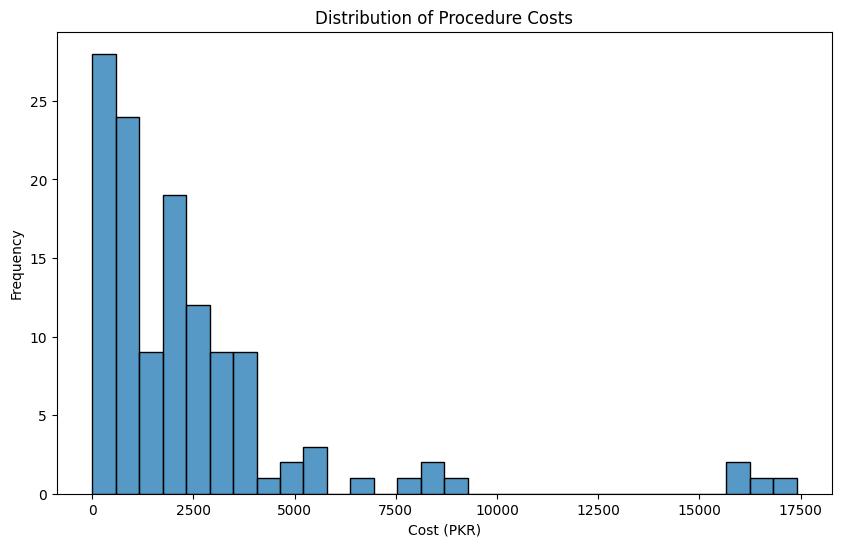

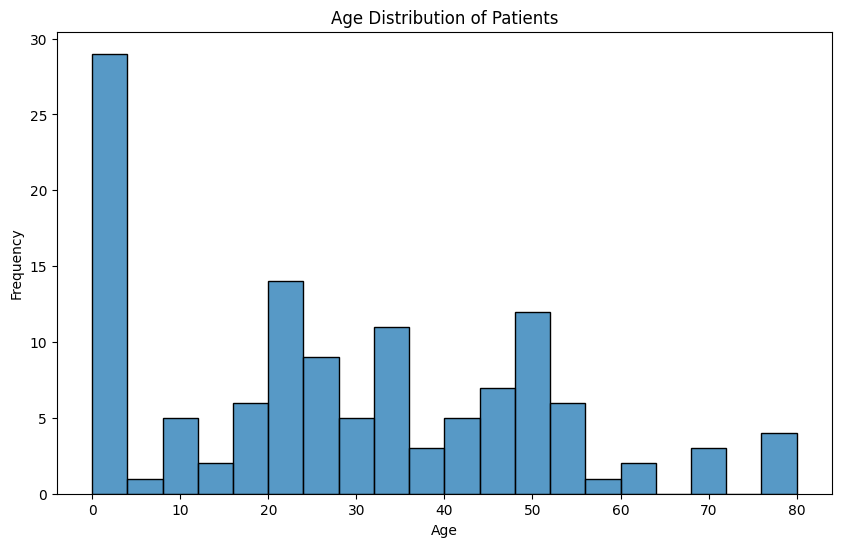

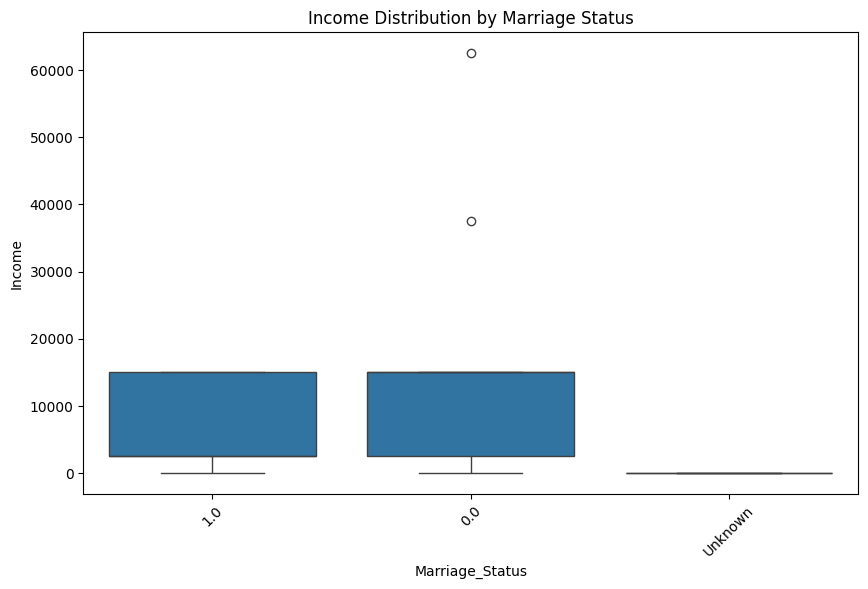

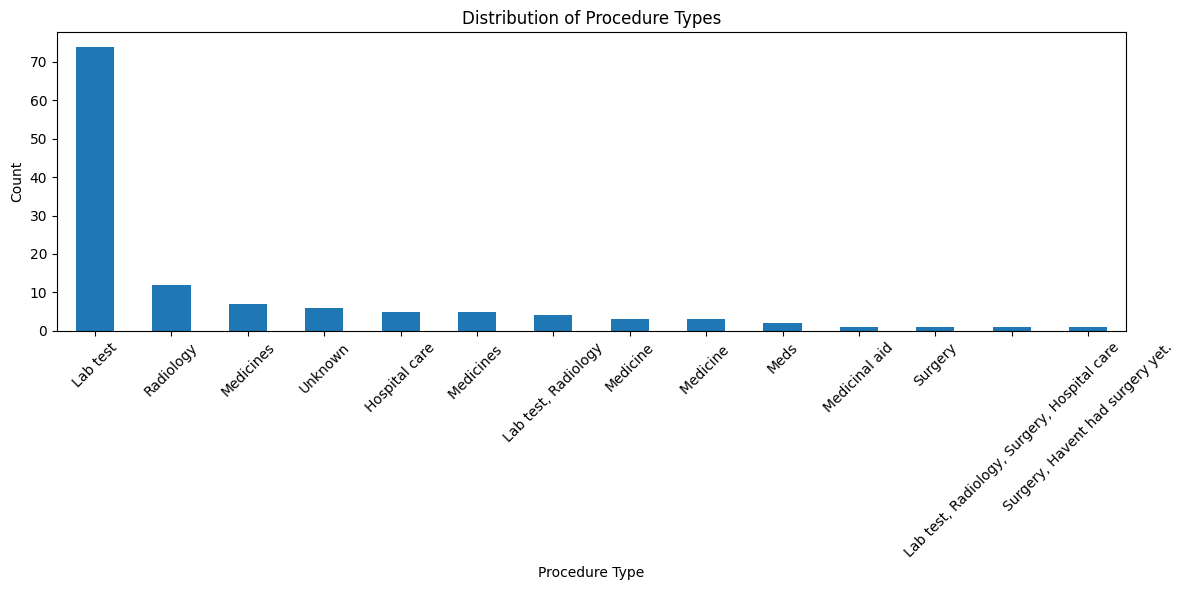

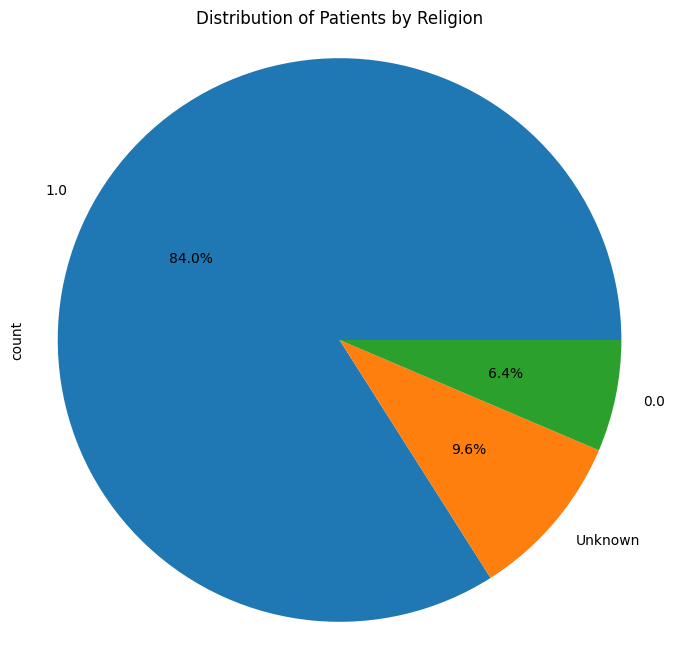

In [ ]:
# 1. Procedure Cost Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_all, x='Procedure_Cost', bins=30)
plt.title('Distribution of Procedure Costs')
plt.xlabel('Cost (PKR)')
plt.ylabel('Frequency')
plt.show()

# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_all, x='Age', bins=20)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Income Distribution by Marriage Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='Marriage_Status', y='Income')
plt.title('Income Distribution by Marriage Status')
plt.xticks(rotation=45)
plt.show()

# 4. Procedure Types Distribution
plt.figure(figsize=(12, 6))
df_all['Procedure_Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Procedure Types')
plt.xlabel('Procedure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Religion Distribution
plt.figure(figsize=(8, 8))
df_all['Religion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Patients by Religion')
plt.axis('equal')
plt.show()